In [148]:
%%html
<script>

function attach_event(){
    $('div.container').on('click', 'div.code_cell div.prompt_container', function() {
      $(this).siblings('.inner_cell').toggle();
    });
}



$(document).ready(attach_event)

$(document).ready(function(){
    
    $(document).on('click', 'div.jp-CodeCell .jp-InputPrompt', function() {
      $(this).siblings('div.jp-Editor').toggle();
    });

    window.ShowCode = function() {
    $('div.jp-CodeCell div.jp-Editor').show(100, function() {
        $('div.jp-CodeCell').css({padding: '5px', border: '1px'});
    });
}

    window.HideCode = function () {
    $('div.jp-CodeCell div.jp-Editor').hide(100, function() {
        $('div.jp-CodeCell').css({padding: 0, border: 0});
    });
}
   

    window.code_toggle = function() {
        (window.code_shown) ? window.HideCode() : window.ShowCode();
        window.code_shown = !window.code_shown
    }
    if($('body.nbviewer').length) {
        $('<li><a href="javascript:window.code_toggle()" title="Show/Hide Code"><span class="fa fa-eye fa-2x menu-icon"></span><span class="menu-text">Show/Hide Code</span></a></li>').appendTo('.navbar-right');
        window.code_shown=false;
    }
});

</script>

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Random Process - Fractal

## Eden cluster Growth

- Biological growth, material decomposition
- starting with an NbyN grid
- an initial seed occupies the center (initial cluster)
- At each time step, a new particle is added to the boundary of the cluster. A boundary site is a site that is not occupied but adjacency to an occupied site.


721


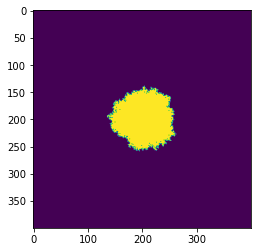

In [123]:
grid_size = 400

# Create the grid with a central seed
grid = np.zeros((grid_size, grid_size))
grid[grid_size//2, grid_size//2] = 1

coord=grid_size//2, grid_size//2

cluster={coord}
neigh=[];
neigh.append(tuple(np.array([0,1])+coord))
neigh.append(tuple(np.array([0,-1])+coord))
neigh.append(tuple(np.array([-1,0])+coord))
neigh.append(tuple(np.array([1,0])+coord))

for i in range(10000):
    rd = np.random.randint(len(neigh));
    coord=neigh.pop(rd)
    cluster.add(coord)
    neigh.append(tuple(np.array([0,1])+coord))
    neigh.append(tuple(np.array([0,-1])+coord))
    neigh.append(tuple(np.array([-1,0])+coord))
    neigh.append(tuple(np.array([1,0])+coord))
    neigh=set(neigh)
    neigh.difference_update(cluster)
    neigh=list(neigh)
print(len(neigh))
cluster = tuple(np.array(list(cluster)).transpose().tolist())
grid[cluster]=1
plt.imshow(grid)

# Diffusion-limited aggregation
- starting with an N by N grid
- an initial seed occupies the center (initial cluster)
- At each time step, a new particle is added to the _edge of grid_. The particle undergoes _random work_ until it reaches the boundary of the cluster and stays there

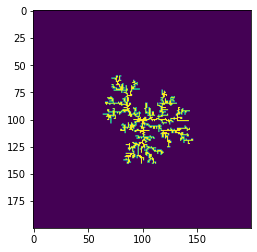

In [124]:
grid_size=200 #take 10 mins to run
edge=[] 
edge.extend(list(map(tuple,np.array([np.zeros(grid_size-2,int),np.arange(1,grid_size-1)]).transpose().tolist())))
edge.extend(list(map(tuple,np.array([(grid_size-1)*np.ones(grid_size-2,int),np.arange(1,grid_size-1)]).transpose().tolist())))
edge.extend(list(map(tuple,np.array([np.arange(1,grid_size-1), np.zeros(grid_size-2,int)]).transpose().tolist())))
edge.extend(list(map(tuple,np.array([np.arange(1,grid_size-1),(grid_size-1)*np.ones(grid_size-2,int)]).transpose().tolist())))
edge.extend([(0,0),(0,grid_size-1),(grid_size-1,0),(grid_size-1,grid_size-1)])

nearest_neigh=[np.array([0,1]),np.array([0,-1]),np.array([1,0]),np.array([-1,0])]
grid = np.zeros((grid_size, grid_size))
grid[grid_size//2, grid_size//2] = 1


for i in range(300000):
    rd = np.random.randint(len(edge));
    coord=edge[rd] #generate a particle on the edge of the grid
    while True:
        dirc = np.random.randint(4) #pick one of the directions to go randomly
        coord=coord+nearest_neigh[dirc] #the new coordinate of the particle
        if coord[0]<0 or coord[0]>=grid_size: #check if the particles goes out of the range
            break
        if coord[1]<0 or coord[1]>=grid_size:
            break
        
        for i in range(4):
            test = tuple(coord+nearest_neigh[dirc]) #check if the neghboring sites of the particle is occupied
            try:
                if grid[test]==1:
                    grid[tuple(coord)]=1;
            except:
                pass
        if (grid[tuple(coord)]==1):
            break
plt.imshow(grid)

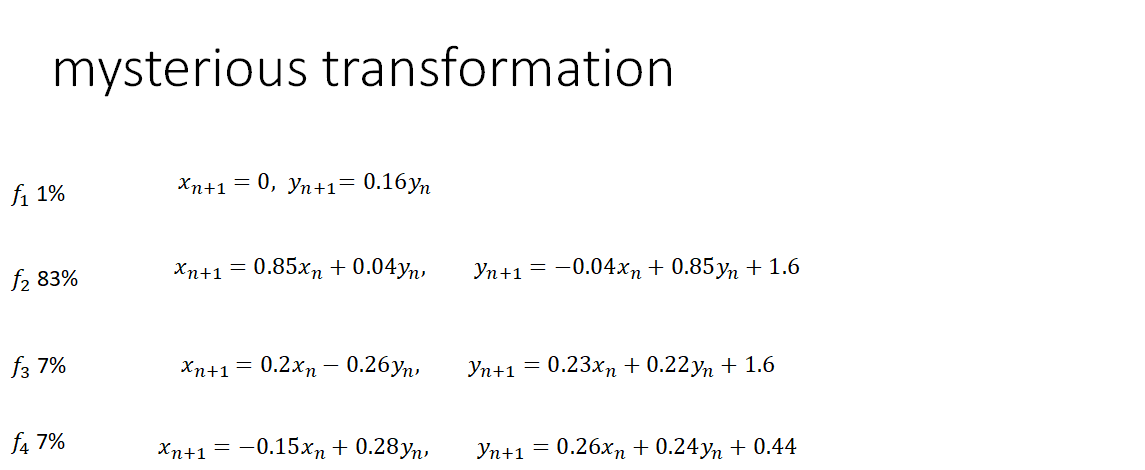

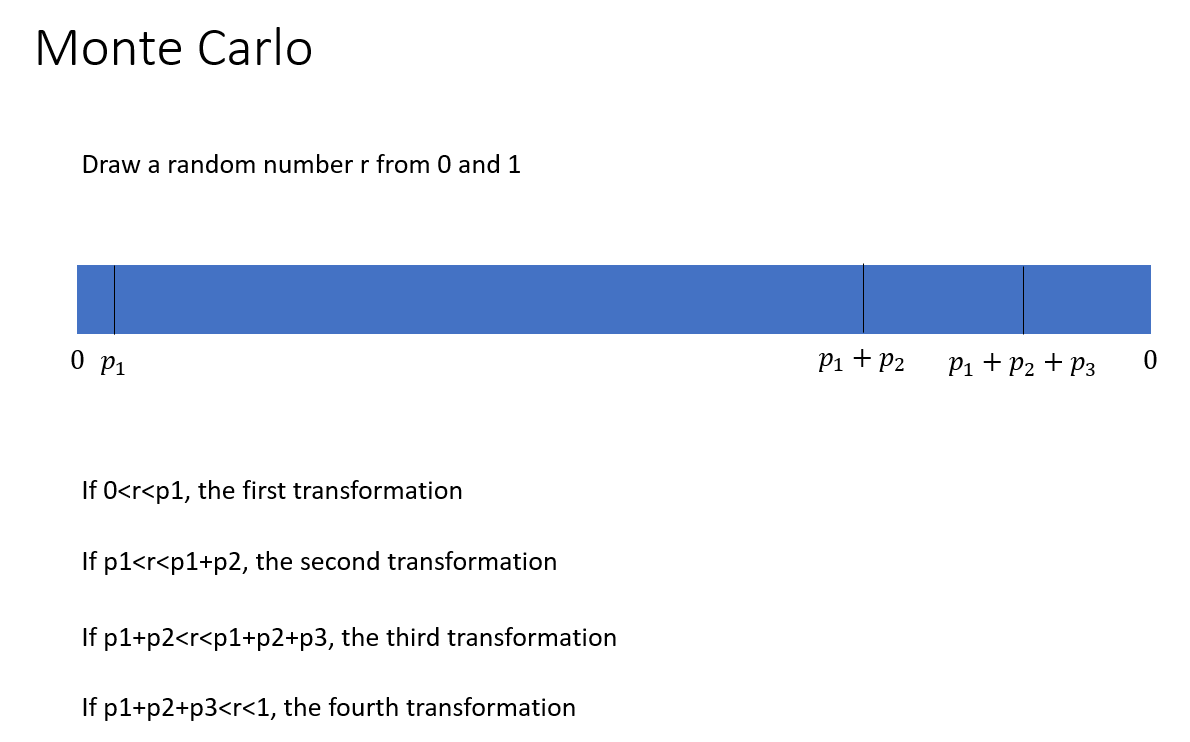

In [125]:
def f(x,y,n):
    if n==1:
        x_new=0
        y_new=0.16*y
    if n==2:
        x_new=0.85*x+0.04*y
        y_new=-0.04*x + 0.85*y + 1.6
    if n==3:
        x_new=0.2*x - 0.26*y
        y_new=0.23*x + 0.22*y +1.6
    if n==4:
        x_new=-0.15*x + 0.28*y
        y_new=0.26*x + 0.24*y + 0.44
    return x_new, y_new

In [126]:
x=0
y=0
x_list=[x]
y_list=[y]

for i_step in range(100000):
    rd = np.random.rand()
    if rd<0.01:
        x,y=f(x,y,1)
    elif rd<0.83+0.01:
        x,y=f(x,y,2)
    elif rd<0.83+0.01+0.08:
        x,y=f(x,y,3)
    else:
        x,y=f(x,y,4)
    
    x_list.append(x)
    y_list.append(y)
    

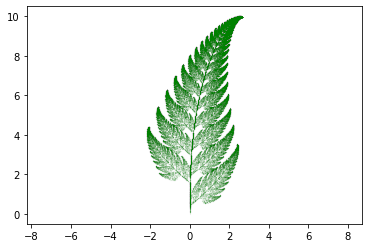

In [127]:
plt.plot(x_list,y_list,'.g',markersize=0.05)
plt.axis('equal')
fig = plt.gcf()
ax = plt.gca()
line = ax.get_lines()[0]

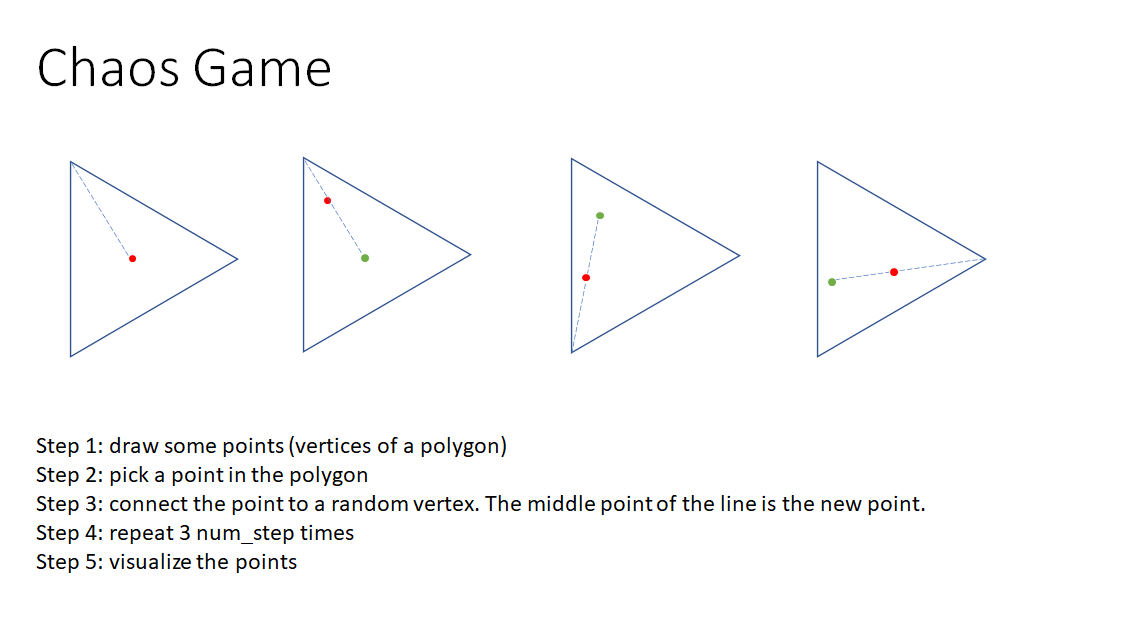

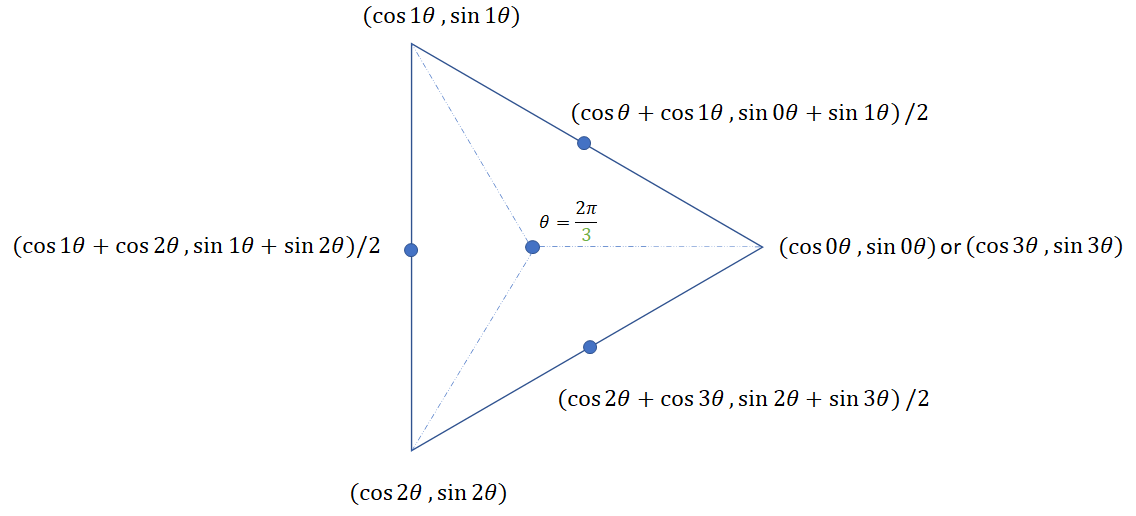

In [128]:
#generate a random integer number
np.random.randint(3)

1

In [141]:
def chaos_game(num_step):
    v1=np.array([1,0])
    v2=np.array([-0.5,3**0.5/2])
    v3=np.array([-0.5,-3**0.5/2])
    r=np.array([0,0])
    x_list=[0]
    y_list=[0]
    
    for i_step in range(num_step):
        rd=np.random.randint(3)
        if rd==0:
            r = (r+v1)/2
        if rd==1:
            r = (r+v2)/2
        if rd==2:
            r = (r+v3)/2
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list
        
    
    

(-0.5744972942002041,
 1.0645698109818775,
 -0.9503740487832316,
 0.9475749088385427)

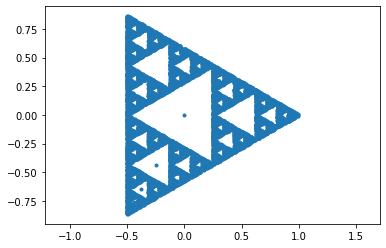

In [142]:
x_list,y_list = chaos_game_simple(10000)
plt.plot(x_list,y_list,'.')
plt.axis('equal')

In [144]:
x_list,y_list = chaos_game(50000)

(-0.5748981672424827,
 1.0728615723608566,
 -0.9519114342964669,
 0.950189862474856)

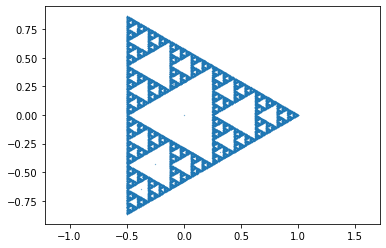

In [145]:
plt.plot(x_list,y_list,'.',markersize=0.5)
plt.axis('equal')

In [136]:
def chaos_game_upgraded(n_poly,p,num_step,center=False, edge=False, rstr_rule=False):
    '''
    an upgraded version to include the option to add midpoint of the edge or centers
    and the option to apply the restriction
    '''
    def restriction(rd):
        '''
        a function determines if rd is accepted
        '''
        if rd==rd_list[-1]: #rd_list is a list record all the past selections
            return False #not accepted
        else:
            return True #accepted
    
    vertex=np.zeros((n_poly,2))
    angle =np.array(range(n_poly))*2*np.pi/n_poly
    vertex[:,0]=np.cos(angle)
    vertex[:,1]=np.sin(angle)
    
    num_vertex=n_poly
    
    center_point=np.zeros((1,2))
    
    edge_point = (vertex + np.roll(vertex,1,axis=0))/2
    
    
    if center:
        vertex=np.vstack((vertex,center_point))
        num_vertex=num_vertex+1
    if edge:
        vertex=np.vstack((vertex,edge_point))
        num_vertex=num_vertex+n_poly
    
    r=np.array([0,0])
    x_list=[0]
    y_list=[0]
    rd_list=[-1] #a list record the history of selections,contains a negative number first,so the first step does not produce an error
    for i in range(num_step):
        rd = np.random.randint(num_vertex)
        if rstr_rule and restriction(rd)==False:
            continue
        else:
            rd_list.append(rd)
        r = p*r + (1-p)*vertex[rd]
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list
        
        

In [137]:
x_list,y_list=chaos_game_upgraded(5,1/2,100000,center=False, edge=False,rstr_rule=True)

(-0.8851862900812808,
 0.84754449727459,
 -0.9087727849856734,
 0.9085966200139225)

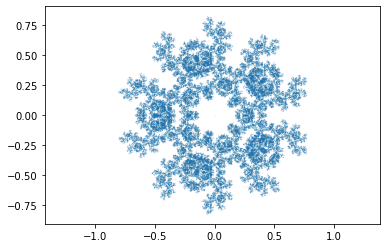

In [138]:
plt.plot(x_list,y_list,'.',markersize=0.1)
plt.axis('equal')

# Deterministic Fractal

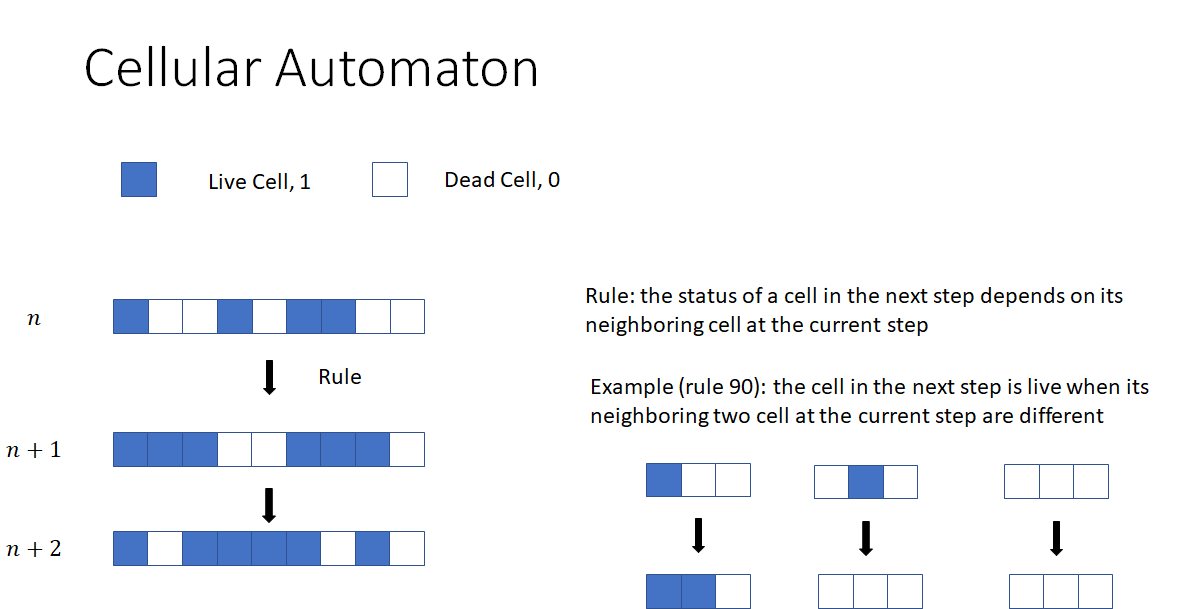

Put each generation together and we get a matrix of 0 and 1. The number rows equals the number of iterations and the number of columns equals the number of cells

In [ ]:
def rule90(init_array, num_step):
    num_cell = len(init_array)
    m = np.zeros((num_step,num_cell)) # a zero matrix num_step*num_cell
    m[0,:]=init_array # record the inital array
    
    for i in range(1, num_step):
        for i_cell in range(1,num_cell-1): #go through cell_1...cell_n-1
            if m[i-1,i_cell-1] == m[i-1,i_cell+1]:
                m[i,i_cell]=0
            else:
                m[i,i_cell]=1
    return m
    

<div style='font-size:20px'>What pattern does it form when we put all generations of cells together?</div>

In [ ]:
init_array = np.zeros(100)
init_array[50]=1 # inital condition
num_step =100

m = rule90(init_array, num_step)

In [ ]:
plt.imshow(m, cmap='Blues')
plt.axis('auto')

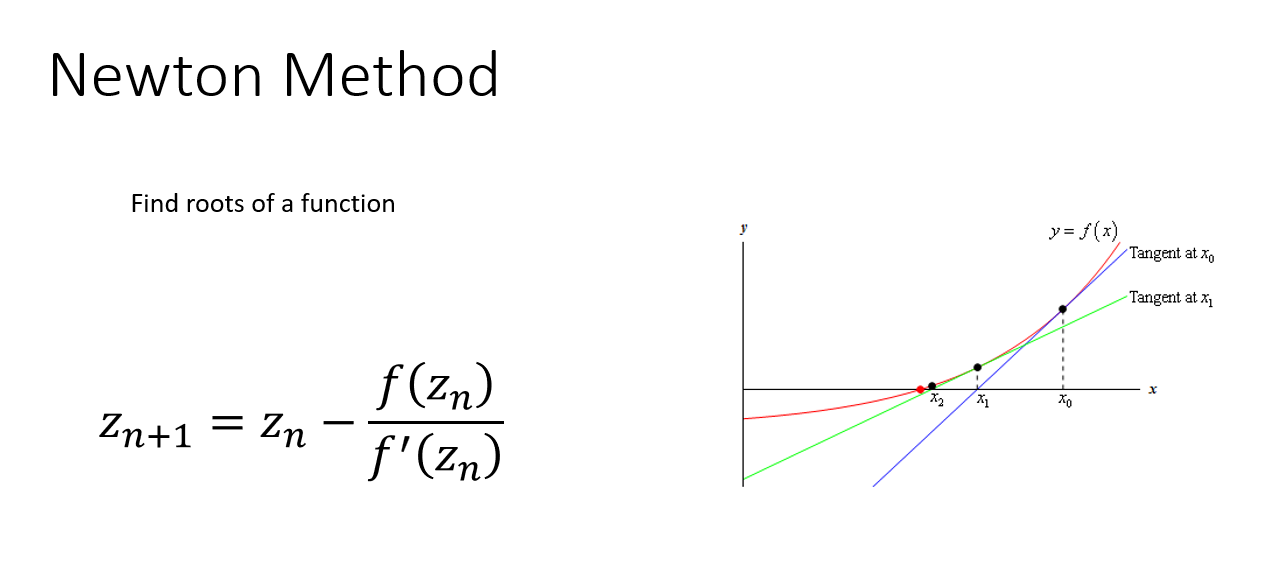

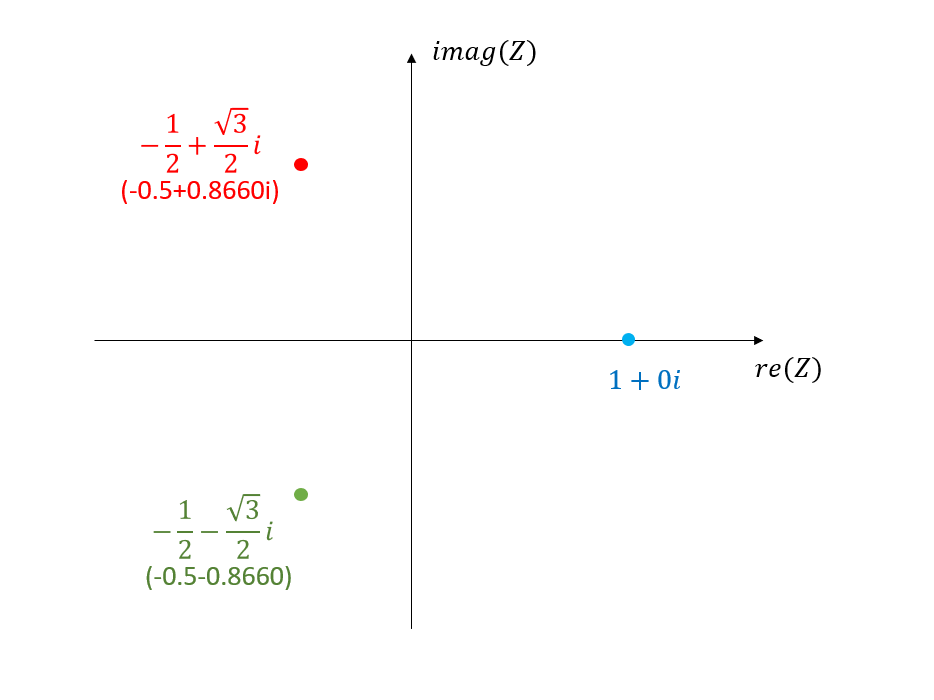

In [ ]:
Newton_method(f,df,np.array([-2.4]),20)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Newton_method(f,df, x, num_step):
    indx=np.array(range(0,x.size))
    for i_step in range(num_step):
        indx=indx[np.where(np.abs(f(x[indx]))>1e-2)] #find the index for the data points not converged yet
        if indx.size==0: 
            break #stop if all the data point converges
        x[indx] = x[indx] - f(x[indx])/df(x[indx]) #newton iteration
    x[indx]=0
    return x


xmin=-1
xmax=1
ymin=-1
ymax=1
dim=1001
f = lambda x:x**3-1
df = lambda x:3*x**2

x = np.linspace(xmin,xmax,dim) #real coordinate
y = np.linspace(ymin,ymax,dim) #imag coordinate
x, y = np.meshgrid(x,y) #generate the 2d array for the real coordinae and imag coordinate
x = x.ravel() #flatten the 2d array to a 1D array
y = y.ravel() 
z= x + 1j*y # get the complex numbers on the complex plane

z= Newton_method(f,df,z,30)

zz = z.reshape((dim,dim));



plt.figure(figsize = (5,5))

plt.imshow(np.real(zz)+3*np.imag(zz),extent=[x.min(), x.max(), y.min(), y.max()])

## Fractal dimension

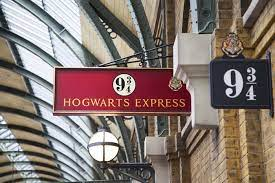

Our intuition: a line is 1D and a circle is 2D. 
$$
S=2\pi r^2
$$

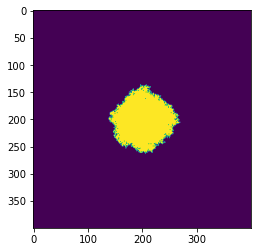

What about this one? How many sites are occupied within a radius of $r$?

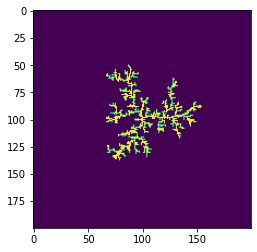 

# Coastline Paradox

"How Long Is the Coast of Britain?"

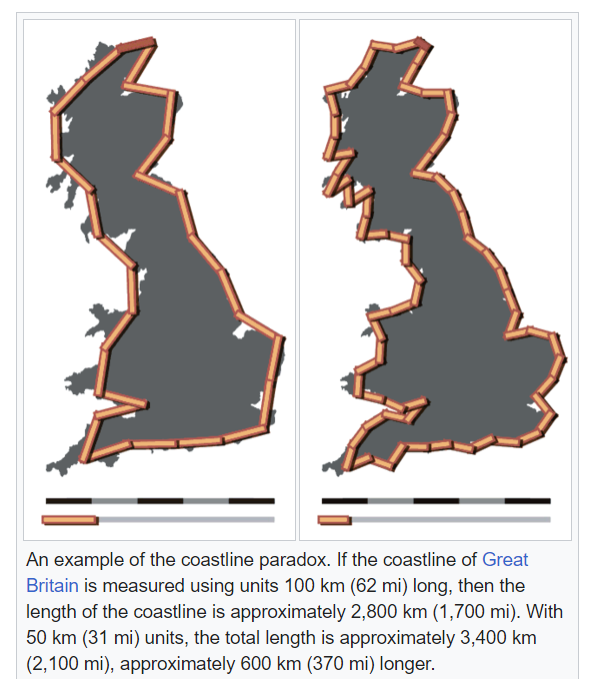

The length of a smooth curve does not change if the length of the ruler is reduced.


$$
L = m l_0
$$
where $l_0$ is the length of th ruler.

$$
L = m\frac{l_0}{\lambda} \lambda
$$

What happens if the length appears to be changing as the ruler becomes shorter and shorter? Weird! But can this happen?

$$
L = m\frac{l_0}{\lambda} \lambda^{dim}
$$

# Koch Curves

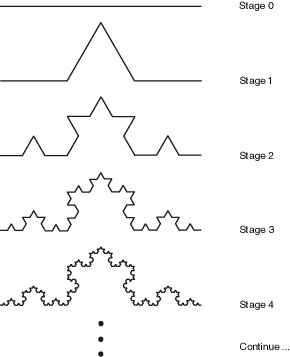

(-0.05, 1.05, -0.014433756729740644, 0.3031088913245535)

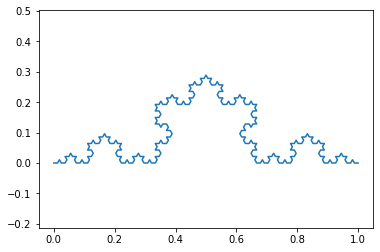

In [146]:
curve=[(0,0),(1,0)]
angle =1*np.pi/3
rot = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
n=4

for _ in range(n):
    new_curve=[curve[0]]
    for i in range(len(curve)-1):
        a = np.array(curve[i])
        b = np.array(curve[i+1])
        r = (b-a)/3
        p1 = a + r
        p2 = p1 + rot@r
        p3 = a + 2*r
        new_curve.extend([tuple(p1), tuple(p2), tuple(p3), tuple(b)])
    curve=new_curve
curve = np.array(curve)
plt.plot(curve[:,0], curve[:,1])
plt.axis('equal')
    


$$
L = \frac{l_0}{3^n}4^n
$$
The curve appears to be longer if the ruler gets shorter.

Set
$$
\lambda=3^n,
$$
and we have
$$
L = \frac{l_0}{\lambda}\lambda^{\log 4/\log 3}
$$
Here $\log 4/\log 3\approx 1.26$ is the _fractal dimension_ of the curve

https://en.wikipedia.org/wiki/List_of_fractals_by_Hausdorff_dimension

